# Credit Card fraud detection
#### Problem type: Binary classification with heavy class imbalance

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


## Load packages

In [5]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression






In [4]:
!pip install --upgrade scikit-learn imbalanced-learn


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 1.3 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.7 MB 1.0 MB/s eta 0:00:08
   ------ --------------------------------- 1.3/8.7 MB 1.3 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.7 MB 1.3 MB/s eta 0:00:06
   -------- ------------------------------- 1.8/8.7 MB 1.3 MB/s eta 0:00:06
   --------- ------------------------------ 2.1/8.7 MB 1.3 MB/s eta 0:00:06
   ---------- ----------------------------- 2.4/8.7 MB 1.3 MB/s eta 0:00:05
   ------------ --------------------------- 2.6/8.7 MB 1.3 MB/s eta 0:00:05
   ------------- -------------------------- 2.9/8.7 MB 1.3 MB/s eta 0:00:05
   -------------- ------------------------- 3.1/8.7 MB 1.3 MB/s eta 0:00:05
   --------------- --------------

In [6]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [8]:
data=pd.read_csv('creditcard.csv')

## 1. Data Understanding

Columns:

* **Time**: seconds since first transaction.
* **Amount**: transaction amount.
* **F1...F28**: anonymized features (from PCA, because real bank features are hidden).
* **Class**: target (0 = legit, 1 = fraud).


### 1.Basic Information

In [3]:
print("Dataset shape:", data.shape)
print("\nData types:\n", data.dtypes)
print("\nMissing values:\n", data.isnull().sum().sum())


Dataset shape: (284807, 31)

Data types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Missing values:
 0


In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


##### Dataset Shape:

* 284,807 rows × 31 columns → large dataset.

##### Data Types:

* All features are numeric (float64) except Class which is integer (0/1 labels).

* No categorical variables, which simplifies preprocessing.

##### Missing Values:

* None → dataset is already clean.

##### Feature Statistics:

* Time: ranges from 0 to ~172,792 seconds (~2 days) → needs scaling if used.

* Amount: ranges from 0 to 25,691 → highly skewed, normalization or log transform may help.

* Features V1–V28: PCA-transformed, already centered around 0 with similar scales (std ~1).

* Class: Fraud cases = 1, Normal cases = 0 → very imbalanced (fraud ≈ 0.17%).

### 2.Class Distribution


Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


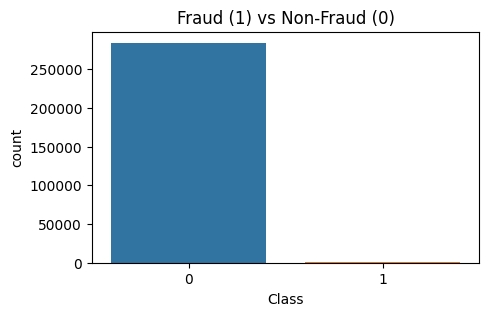

In [7]:
fraud_count = data['Class'].value_counts()
print("\nClass distribution:\n", fraud_count)

plt.figure(figsize=(5,3))
sns.countplot(x='Class', data=data)
plt.title("Fraud (1) vs Non-Fraud (0)")
plt.show()


In [8]:
fraud_ratio = fraud_count[1] / fraud_count[0]
print(f"Fraud ratio: {fraud_ratio:.6f} (~{fraud_ratio*100:.4f}%)")

Fraud ratio: 0.001730 (~0.1730%)


### 3.Amount Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



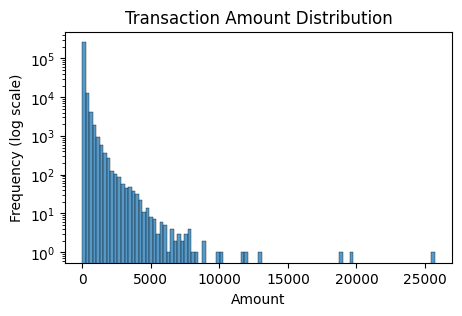

In [13]:
plt.figure(figsize=(5,3))
sns.histplot(data['Amount'], bins=100, log_scale=(False, True))
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency (log scale)")
plt.show()

* The graph shows a highly skewed distribution of transaction amounts, with the majority of transactions being of relatively low amounts.There is a long tail of transactions with higher amounts, but these occur much less frequently compared to the low-value transactions.

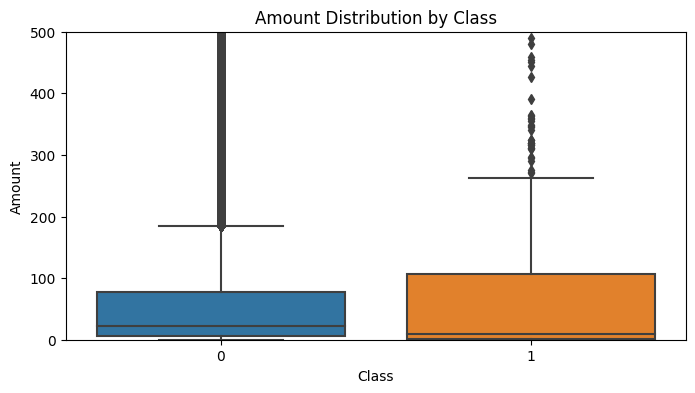

In [12]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Class', y='Amount', data=data)
plt.ylim(0, 500)  # zoom in, most amounts are <500
plt.title("Amount Distribution by Class")
plt.show()

* The dataset is heavily dominated by Class 0, representing the vast majority of transactions with a wider frequency and range of amounts. In contrast, Class 1 transactions are rare and behave like outliers, often involving fewer but relatively higher-value amounts.

### 4.Time Feature Analysis

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


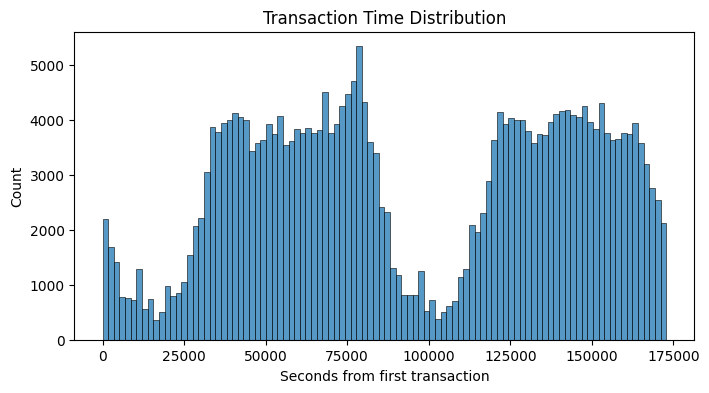

In [11]:
plt.figure(figsize=(8,4))
sns.histplot(data['Time'], bins=100, kde=False)
plt.title("Transaction Time Distribution")
plt.xlabel("Seconds from first transaction")
plt.show()

The distribution is spiky with periodic patterns, a long tail, and a few clear outliers.


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



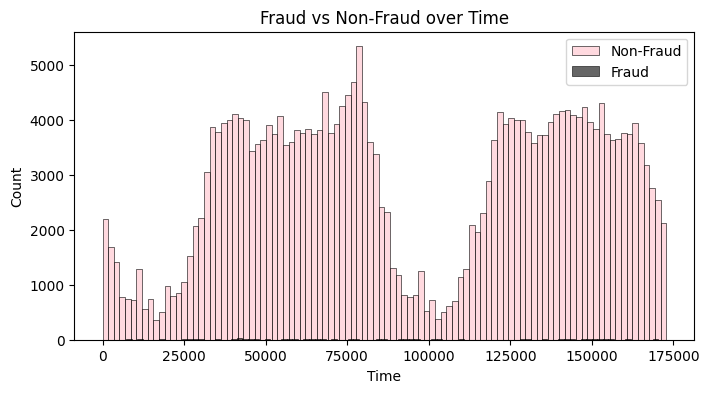

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(data[data['Class']==0]['Time'], bins=100, color='pink', label='Non-Fraud', alpha=0.6)
sns.histplot(data[data['Class']==1]['Time'], bins=100, color='black', label='Fraud', alpha=0.6)
plt.title("Fraud vs Non-Fraud over Time")
plt.legend()
plt.show()

### 5. Correlation Heatmap

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning:

invalid value encountered in less



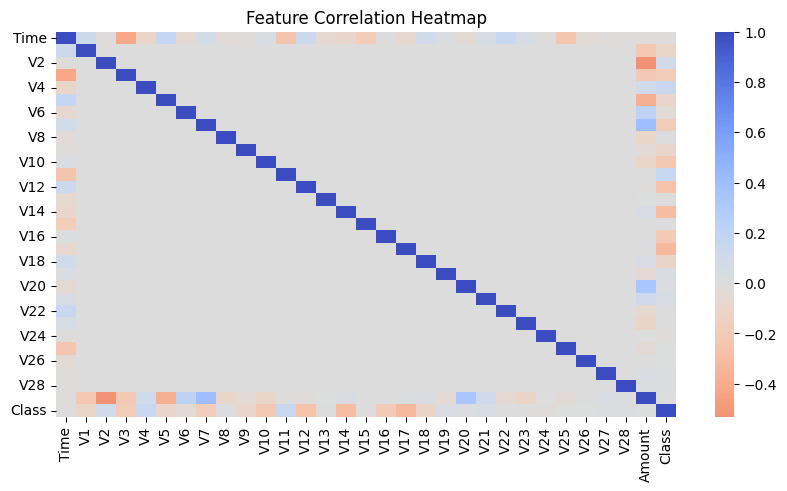

In [17]:
plt.figure(figsize=(10,5))
corr = data.corr()
sns.heatmap(corr, cmap="coolwarm_r", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

* The correlation heatmap shows that most features are weakly correlated with each other and with the target class. No strong linear relationships stand out, meaning multicollinearity is not a major issue in this dataset.


In [15]:
corr_class = corr['Class'].sort_values(ascending=False)
print("\nCorrelation with Class:\n", corr_class)


Correlation with Class:
 Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64


* Correlation with the target shows that no single feature has a very strong relationship with Class.  
* The highest positive correlations are with V11, V4, and V2, while features like V17, V14, and V12 show the strongest negative correlations. This suggests that multiple features together will be important for classification, rather than any single variable being decisive.


##### check missing value 

In [23]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()
print("\nMissing Values :\n",total)



Missing Values :
 Time      0
V16       0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V15       0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
Class     0
dtype: int64


## 2. Preprocessing & Balancing

#### 1.Split the data

In [22]:
# Separate features and target
X = data.drop(['Class', 'Time'], axis=1)  # drop 'Time' since usually not useful
y = data['Class']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


#### 2.Balance the training set using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import BorderlineSMOTE



In [23]:
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Check class distribution after balancing
print(pd.Series(y_train_bal).value_counts())


Class
0    199020
1    199020
Name: count, dtype: int64


#### 3.Scale features

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)

## 3. Modeling

After preprocessing the data, handling class imbalance with SMOTE, and scaling the features, the next step is to train machine learning models to detect fraudulent transactions. Fraud detection is a highly imbalanced classification problem, where the minority class (fraud) is rare but critical to detect.

For this task, we selected three models:

* Logistic Regression – A simple linear model used as a baseline. It is fast and interpretable, allowing us to understand the basic separability of the data.
* Random Forest – An ensemble of decision trees that can capture non-linear relationships and handle high-dimensional data effectively. It is robust to overfitting and provides feature importance.
* XGBoost – A gradient boosting algorithm optimized for tabular data. It often delivers state-of-the-art performance in imbalanced classification tasks, making it highly suitable for fraud detection.

We evaluate all three models using precision, recall, F1-score for the fraud class, and ROC-AUC, focusing especially on recall to ensure the majority of fraudulent transactions are detected. This approach allows us to compare models based on both overall discrimination and their effectiveness in identifying fraud.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

#### Logistic Regression

In [25]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train_bal)
y_pred_lr = lr.predict(X_test_scaled)
print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1]))
print(confusion_matrix(y_test, y_pred_lr))

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.08      0.86      0.15       148

    accuracy                           0.98     85443
   macro avg       0.54      0.92      0.57     85443
weighted avg       1.00      0.98      0.99     85443

ROC-AUC: 0.9584894555144863
[[83825  1470]
 [   21   127]]


* Logistic Regression detects most frauds (high recall) but generates many false positives, making it impractical for real-world deployment.
* The model is strong at separating fraud vs normal transactions overall (high ROC-AUC), but poor precision means too many normal transactions are incorrectly flagged.

#### Random Forest

In [27]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train_bal)
y_pred_rf = rf.predict(X_test_scaled)
print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test_scaled)[:,1]))
print(confusion_matrix(y_test, y_pred_rf))




=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.80      0.83       148

    accuracy                           1.00     85443
   macro avg       0.94      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.9621259206917803
[[85278    17]
 [   30   118]]


* Random Forest gives high precision and solid recall, meaning it detects most frauds while keeping false positives very low.
* Compared to XGBoost, it has slightly lower recall (80% vs 82%) but higher precision (87% vs 80%).
* Overall, it’s very reliable for real-world fraud detection.

#### XGBoost

In [26]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train_bal)
y_pred_xgb = xgb.predict(X_test_scaled)
print("\n=== XGBoost ===")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test_scaled)[:,1]))
print(confusion_matrix(y_test, y_pred_xgb))

c:\Users\sarah\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning:

[21:05:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





=== XGBoost ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.80      0.82      0.81       148

    accuracy                           1.00     85443
   macro avg       0.90      0.91      0.90     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC: 0.9739288764114369
[[85265    30]
 [   27   121]]


* XGBoost performs very well on this dataset, capturing most fraud cases with high accuracy while maintaining a low false positive rate. Given the imbalanced nature of the data, the recall of 82% indicates strong detection capability for the minority class.

## 4. Evaluation & Results

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [30]:
models = {
    'Logistic Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}

precision, recall, f1, roc_auc = [], [], [], []

for name, y_pred in models.items():
    # Precision, Recall, F1 for fraud class (class 1)
    precision.append(precision_score(y_test, y_pred, pos_label=1))
    recall.append(recall_score(y_test, y_pred, pos_label=1))
    f1.append(f1_score(y_test, y_pred, pos_label=1))
    
    # ROC-AUC using predicted probabilities
    if name == 'Logistic Regression':
        y_proba = lr.predict_proba(X_test_scaled)[:,1]
    elif name == 'Random Forest':
        y_proba = rf.predict_proba(X_test_scaled)[:,1]
    else:  # XGBoost
        y_proba = xgb.predict_proba(X_test_scaled)[:,1]
    
    roc_auc.append(roc_auc_score(y_test, y_proba))

# Now you can plot the metrics automatically
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("ROC-AUC:", roc_auc)

Precision: [0.07952410770194114, 0.8740740740740741, 0.8013245033112583]
Recall: [0.8581081081081081, 0.7972972972972973, 0.8175675675675675]
F1: [0.14555873925501434, 0.833922261484099, 0.8093645484949833]
ROC-AUC: [0.9584894555144863, 0.9621259206917803, 0.9739288764114369]


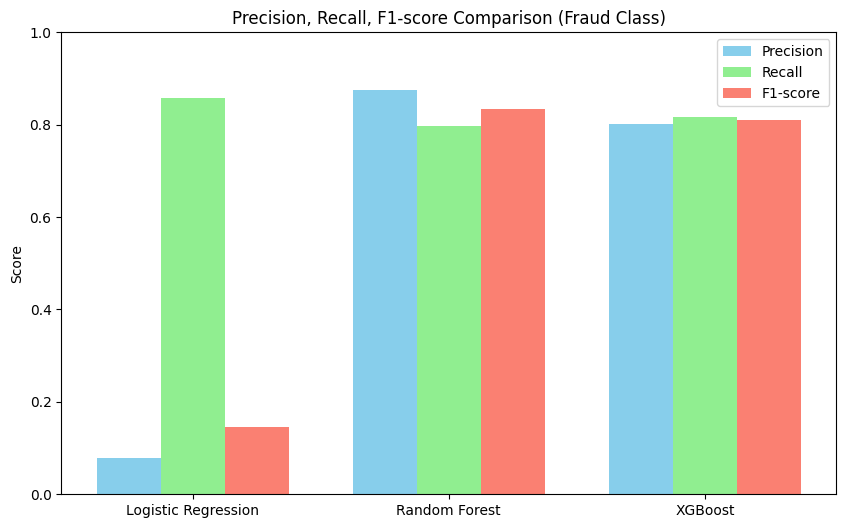

In [35]:
# ===== 1. Precision, Recall, F1 comparison =====


x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))
plt.bar(x - width, precision, width, label='Precision', color='skyblue')
plt.bar(x, recall, width, label='Recall', color='lightgreen')
plt.bar(x + width, f1, width, label='F1-score', color='salmon')
plt.xticks(x, models)
plt.ylim(0,1)
plt.title('Precision, Recall, F1-score Comparison (Fraud Class)')
plt.ylabel('Score')
plt.legend()
plt.show()


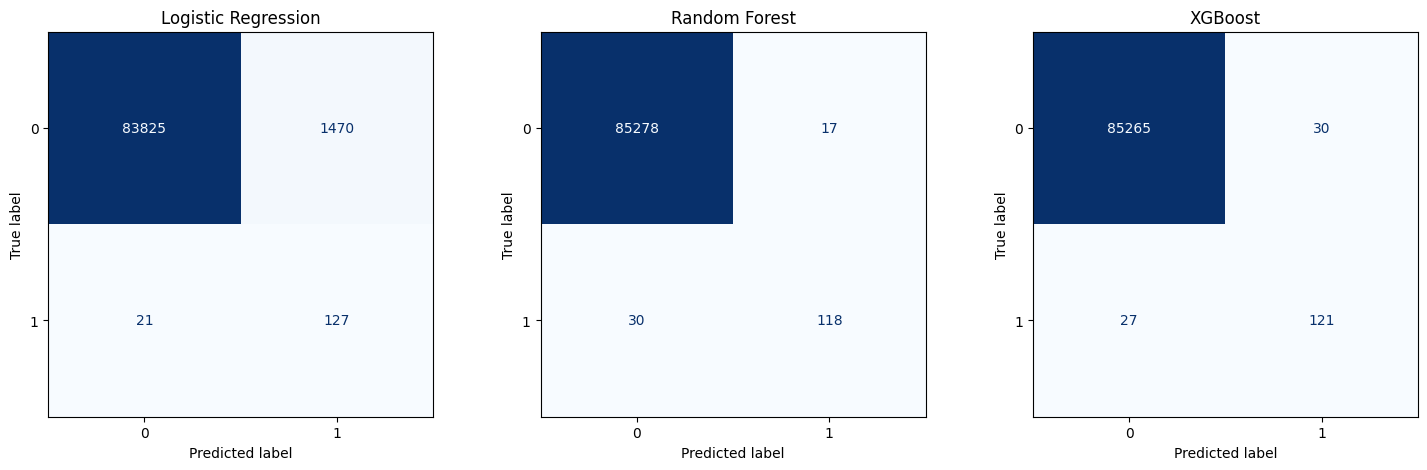

In [32]:
# ===== 3. Optional: Confusion Matrices Side by Side =====
from sklearn.metrics import ConfusionMatrixDisplay

# Suppose y_pred_lr, y_pred_rf, y_pred_xgb exist
fig, axes = plt.subplots(1,3, figsize=(18,5))
for ax, y_pred, name in zip(axes, [y_pred_lr, y_pred_rf, y_pred_xgb], models):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=[0,1])
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(name)
plt.show()

* Logistic Regression
High recall (0.86) but extremely low precision (0.08) for fraud detection.
Flags too many normal transactions as fraud → impractical for deployment despite decent ROC-AUC.
* Random Forest
Strong balance: high precision (0.87) and solid recall (0.80) for fraud class.
Very few false positives, slightly fewer frauds detected compared to XGBoost.
Reliable choice for practical fraud detection.

* XGBoost
Slightly higher recall (0.82) than Random Forest, slightly lower precision (0.80).
Best overall ROC-AUC (0.974), indicating excellent discrimination between fraud and normal transactions.
Slightly more false positives than Random Forest, but catches more frauds.

#### Overall:
XGBoost is the best-performing model for this dataset if the priority is detecting as many frauds as possible.
Random Forest is nearly as good and could be preferred if minimizing false positives is more important.
Logistic Regression is unsuitable for real-world deployment due to extremely low precision.